In [1]:
import numpy as np
import pandas as pd
import nltk
from textblob import TextBlob
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/medep/Downloads/amazon_reviews.csv")

In [3]:
df.shape

(52601, 8)

In [4]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [5]:
df.head(10)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,ec49d203-8717-457e-8c54-0026827915bd,Ray Hernandez,Amazon shopping has made all my purchases easy...,5,0,28.5.2.100,2024-06-04 22:20:45,28.5.2.100
1,20ea53b7-e0c4-4b10-83f0-f14c42f5827b,freya singh,Fun,5,0,NaN,2024-06-04 22:01:57,NaN
2,b801ccd4-7c47-4429-83d6-37a5fde3f2f7,Brian Archie,10-14 days on food items is a waste of time. V...,1,1,28.11.1.100,2024-06-04 21:04:02,28.11.1.100
3,730170ab-6f09-420e-8d67-ae91407fb5a6,Thelma Mosterd,Ausome love it,5,0,28.11.2.100,2024-06-04 20:37:59,28.11.2.100
4,29d1cfb5-93ef-41a7-b285-3d1b2eba8ce0,Mohamed Maghawry,Worst customer service and worst delivery ever,1,0,28.11.1.100,2024-06-04 20:24:13,28.11.1.100
5,be9661df-90a7-410b-90d2-8e01863255e3,Louise Hill,I love Amazon shopping because I can get my it...,5,0,28.11.1.100,2024-06-04 20:00:37,28.11.1.100
6,f4d82c01-6a8a-4e9f-b99c-117548b56164,Ken Patton,One star until TRUE Native Dark Mode is implem...,1,0,28.10.0.100,2024-06-04 19:51:01,28.10.0.100
7,05d8a3f1-6b6e-4f7b-bd23-d7d5017368b7,Emile Lacheny,When it works it's good Have to buy prime to g...,1,1,28.11.2.100,2024-06-04 19:27:56,28.11.2.100
8,b058dd94-1d50-4076-a5de-6f1e5e1c1b55,Y G,"a quick way to get what you need, no headache ...",5,0,28.11.1.100,2024-06-04 19:26:21,28.11.1.100
9,a0c8e2eb-d82e-4f6b-92b7-b69d247f9ece,Bill Friggle Photography,Love it.,5,0,28.11.1.100,2024-06-04 19:25:27,28.11.1.100


In [6]:
df.tail(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
52596,ac82191a-e776-42a0-8e30-91eabb763968,Mary Mora,Amazon Smile donates. Make sure you get all se...,5,0,26.1.2.100,2023-01-16 06:12:14,26.1.2.100
52597,3aa6af38-b044-4257-9cf3-b94c437da0ef,Marie Elliott,After having problems with the app and having ...,5,1,22.18.0.100,2021-09-24 12:01:29,22.18.0.100
52598,727ec38a-c633-48f4-a302-66e52740a43c,Dan Preston,"Used to be great. Got greedy, they ruined the ...",1,0,26.9.0.100,2023-05-15 18:27:24,26.9.0.100
52599,615a9643-cd36-4010-9a81-8763bac11ddf,Jhosh,New search bar location sucks. At least give m...,2,0,26.12.0.100,2023-06-11 15:24:08,26.12.0.100
52600,6b818e48-406b-4b9d-88c6-759152019a96,Christopher Read,for me personally I use Amazon prime due to be...,5,0,24.9.0.100,2022-05-08 17:59:37,24.9.0.100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52601 entries, 0 to 52600
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              52601 non-null  object
 1   userName              52596 non-null  object
 2   content               52599 non-null  object
 3   score                 52601 non-null  int64 
 4   thumbsUpCount         52601 non-null  int64 
 5   reviewCreatedVersion  47452 non-null  object
 6   at                    52601 non-null  object
 7   appVersion            47452 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.2+ MB


In [8]:
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)  
    text = text.strip() 
    return text

In [9]:
df['content_c'] = df['content'].apply(preprocess_text)
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,content_c
0,ec49d203-8717-457e-8c54-0026827915bd,Ray Hernandez,Amazon shopping has made all my purchases easy...,5,0,28.5.2.100,2024-06-04 22:20:45,28.5.2.100,amazon shopping has made all my purchases easy...
1,20ea53b7-e0c4-4b10-83f0-f14c42f5827b,freya singh,Fun,5,0,NaN,2024-06-04 22:01:57,NaN,fun
2,b801ccd4-7c47-4429-83d6-37a5fde3f2f7,Brian Archie,10-14 days on food items is a waste of time. V...,1,1,28.11.1.100,2024-06-04 21:04:02,28.11.1.100,days on food items is a waste of time very lim...
3,730170ab-6f09-420e-8d67-ae91407fb5a6,Thelma Mosterd,Ausome love it,5,0,28.11.2.100,2024-06-04 20:37:59,28.11.2.100,ausome love it
4,29d1cfb5-93ef-41a7-b285-3d1b2eba8ce0,Mohamed Maghawry,Worst customer service and worst delivery ever,1,0,28.11.1.100,2024-06-04 20:24:13,28.11.1.100,worst customer service and worst delivery ever


In [10]:
df.isnull()
total_null_values = df.isnull().sum().sum()
print(total_null_values)

10305


In [11]:
df.fillna('', inplace=True)

In [12]:
df['at'] = pd.to_datetime(df['at'])

In [13]:
df = df[['content_c', 'score', 'reviewId', 'at']]
df.head()

,content_c,score,reviewId,at
0,amazon shopping has made all my purchases easy...,5,ec49d203-8717-457e-8c54-0026827915bd,2024-06-04 22:20:45
1,fun,5,20ea53b7-e0c4-4b10-83f0-f14c42f5827b,2024-06-04 22:01:57
2,days on food items is a waste of time very lim...,1,b801ccd4-7c47-4429-83d6-37a5fde3f2f7,2024-06-04 21:04:02
3,ausome love it,5,730170ab-6f09-420e-8d67-ae91407fb5a6,2024-06-04 20:37:59
4,worst customer service and worst delivery ever,1,29d1cfb5-93ef-41a7-b285-3d1b2eba8ce0,2024-06-04 20:24:13


In [14]:
print("Earliest review date:", df['at'].min())
print("Latest review date:", df['at'].max())

Earliest review date: 2018-09-12 10:08:56
Latest review date: 2024-06-04 22:20:45


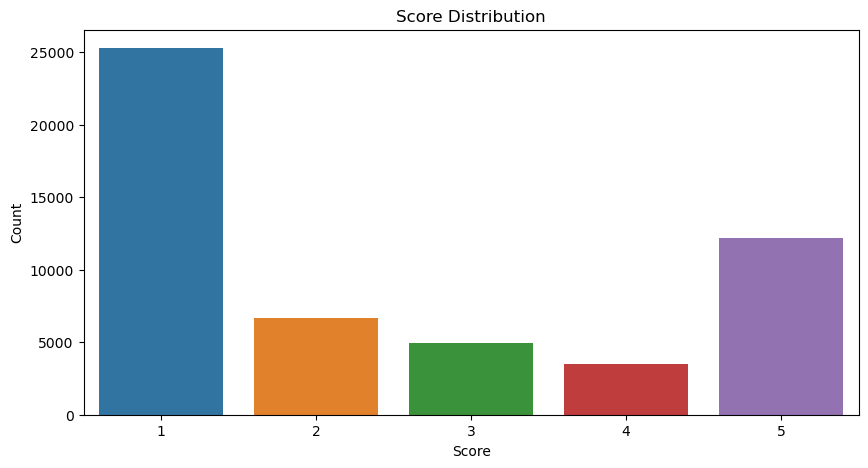

In [15]:
score_counts = df.score.value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=score_counts.index, y=score_counts.values)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Distribution')
plt.show()

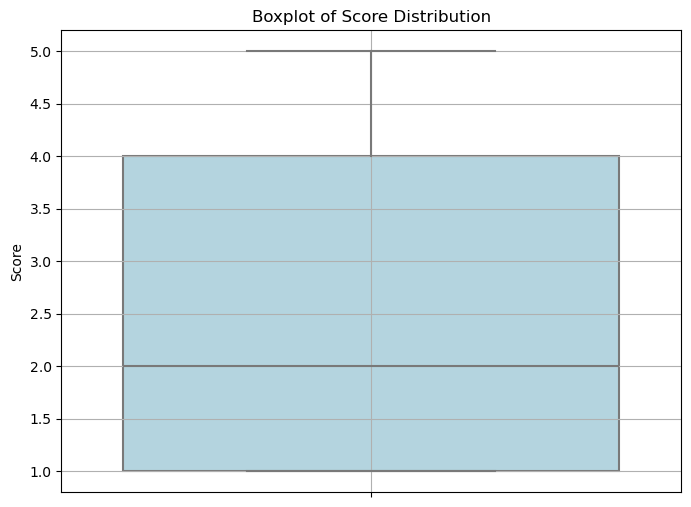

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='score', data=df, color='lightblue')
plt.ylabel('Score')
plt.title('Boxplot of Score Distribution')
plt.grid(True)
plt.show()

In [17]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [18]:
df['sentiment'] = df['content_c'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))

In [19]:
df[['content_c', 'score', 'sentiment_label']]

,content_c,score,sentiment_label
0,amazon shopping has made all my purchases easy...,5,positive
1,fun,5,positive
2,days on food items is a waste of time very lim...,1,positive
3,ausome love it,5,positive
4,worst customer service and worst delivery ever,1,negative
...,...,...,...
52596,amazon smile donates make sure you get all set...,5,positive
52597,after having problems with the app and having ...,5,positive
52598,used to be great got greedy they ruined the mu...,1,positive
52599,new search bar location sucks at least give me...,2,neutral


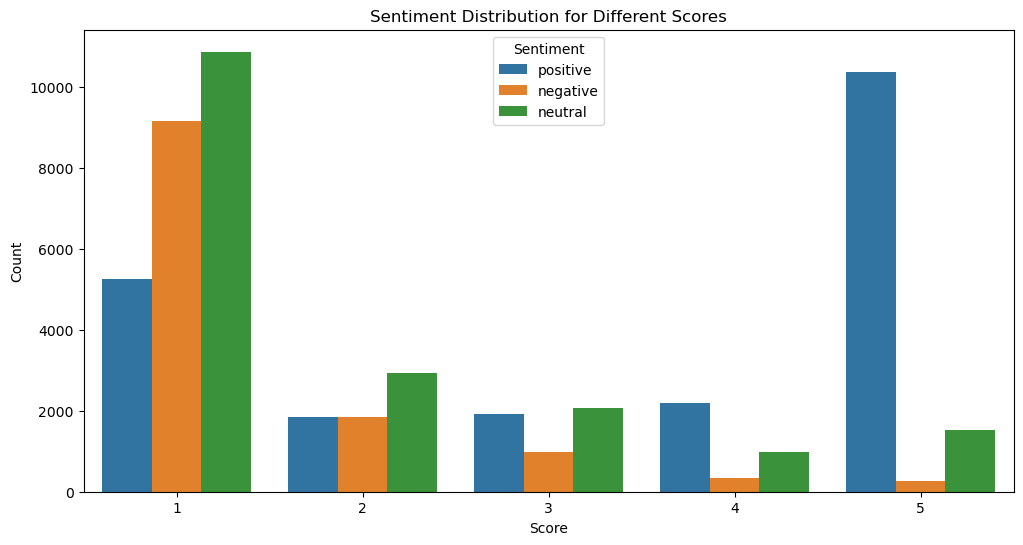

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='score', hue='sentiment_label')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Different Scores')
plt.legend(title='Sentiment')
plt.show()

In [21]:
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone'])

In [22]:
negative_reviews = ' '.join(df[df['sentiment_label'] == 'negative']['content_c'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

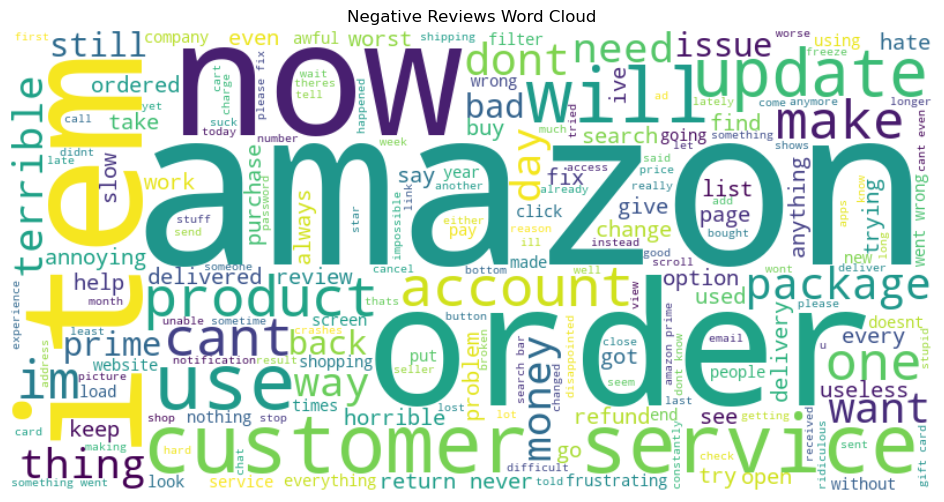

In [23]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

In [24]:
def preprocess_text_data(text):
    tokens = [token for token in text.lower().split() if token.isalnum()]
    return tokens
texts = [preprocess_text(text) for text in df[df['sentiment_label']=='negative']['content_c']]

In [25]:
texts[:10]

['worst customer service and worst delivery ever',
 'when it works its good have to buy prime to get decent service however god help you if you have a problem as youll have to deal with the worst customer service i have ever seen for a company that makes this much money it is shameful to have such terrible customer service all around cancelled my prime membership and will always try to buy local from now on',
 'as a first time user i am very disappointed that your app is so slow your filters are and page outlay is very poor i wanted to see how you compare to takealot and they win hands down',
 'dont buy from rd partys amazon wont stand behind you or your purchase plane and simply',
 'brain dead delivery peoplecant follow directions if their life depended on it complain  you get nothing total waste',
 'constant issues with returning defective items poor customer service',
 'why does it suddenly have to change currency what is wrong with it',
 'cant change country from usa to france what

In [26]:
tokenized_texts = [simple_preprocess(text) for text in texts]
tokenized_texts = [[word for word in doc if word not in stopwords] for doc in tokenized_texts]

In [27]:
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_texts]

In [28]:
tokenized_texts[0][:5]

['worst', 'customer', 'service', 'worst', 'delivery']

In [29]:
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=5, workers=2)

In [30]:
topics = lda_model.print_topics(-1)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

Topic 0: 0.030*"amazon" + 0.012*"im" + 0.010*"money" + 0.010*"account" + 0.010*"cant" + 0.009*"card" + 0.009*"order" + 0.008*"now" + 0.008*"use" + 0.008*"back"
Topic 1: 0.024*"amazon" + 0.011*"update" + 0.010*"search" + 0.010*"products" + 0.009*"cant" + 0.009*"doesnt" + 0.009*"prime" + 0.008*"bad" + 0.008*"dont" + 0.007*"even"
Topic 2: 0.020*"amazon" + 0.018*"customer" + 0.017*"service" + 0.015*"account" + 0.009*"cant" + 0.008*"search" + 0.008*"change" + 0.007*"now" + 0.007*"horrible" + 0.007*"terrible"
Topic 3: 0.016*"amazon" + 0.014*"update" + 0.012*"service" + 0.012*"now" + 0.011*"slow" + 0.011*"delivery" + 0.011*"use" + 0.010*"dont" + 0.010*"will" + 0.009*"customer"
Topic 4: 0.024*"wrong" + 0.017*"amazon" + 0.017*"something" + 0.012*"items" + 0.012*"went" + 0.011*"service" + 0.010*"item" + 0.008*"order" + 0.008*"now" + 0.008*"dont"


In [31]:
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

In [34]:
X = df['content_c'].values
y = df['sentiment_label'].apply(lambda x: 1 if x == 'positive' else 0 if x == 'negative' else 2).values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [37]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

In [38]:
X = df['content_c'].values
y = df['sentiment_label'].apply(lambda x: 1 if x == 'positive' else 0 if x == 'negative' else 2).values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [41]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [42]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax')) 

In [43]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001, restore_best_weights=True)

In [45]:
epochs = 10
batch_size = 64

In [54]:
history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

Epoch 1/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 157s 238ms/step - accuracy: 0.9564 - loss: 0.1172 - val_accuracy: 0.8840 - val_loss: 0.3168
Epoch 2/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 160s 243ms/step - accuracy: 0.9659 - loss: 0.0966 - val_accuracy: 0.8881 - val_loss: 0.3203
Epoch 3/10
658/658 ━━━━━━━━━━━━━━━━━━━━ 186s 282ms/step - accuracy: 0.9703 - loss: 0.0820 - val_accuracy: 0.8856 - val_loss: 0.3439


In [55]:
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=2)
print(f'Test Accuracy: {accuracy}')

329/329 - 12s - 36ms/step - accuracy: 0.8840 - loss: 0.3168
Test Accuracy: 0.884041428565979


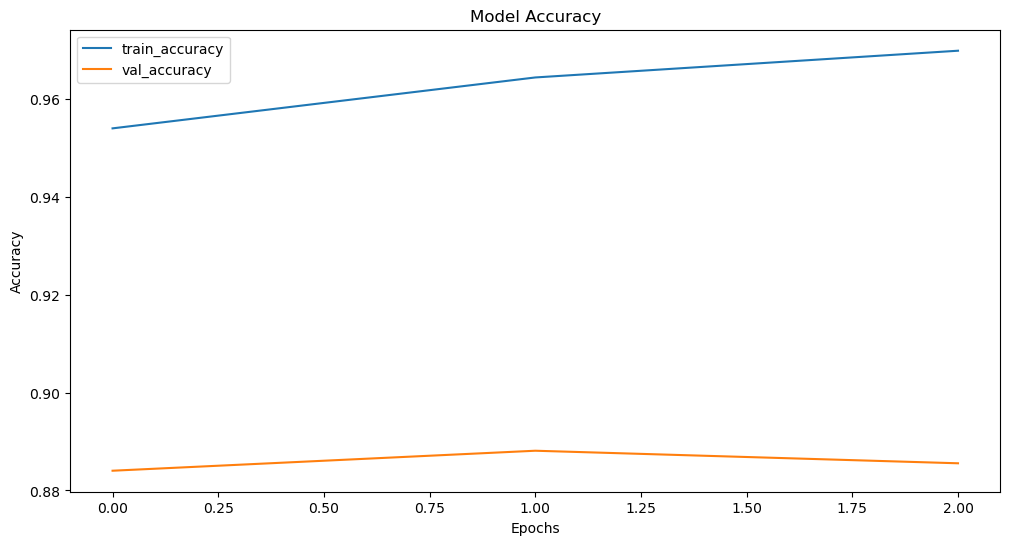

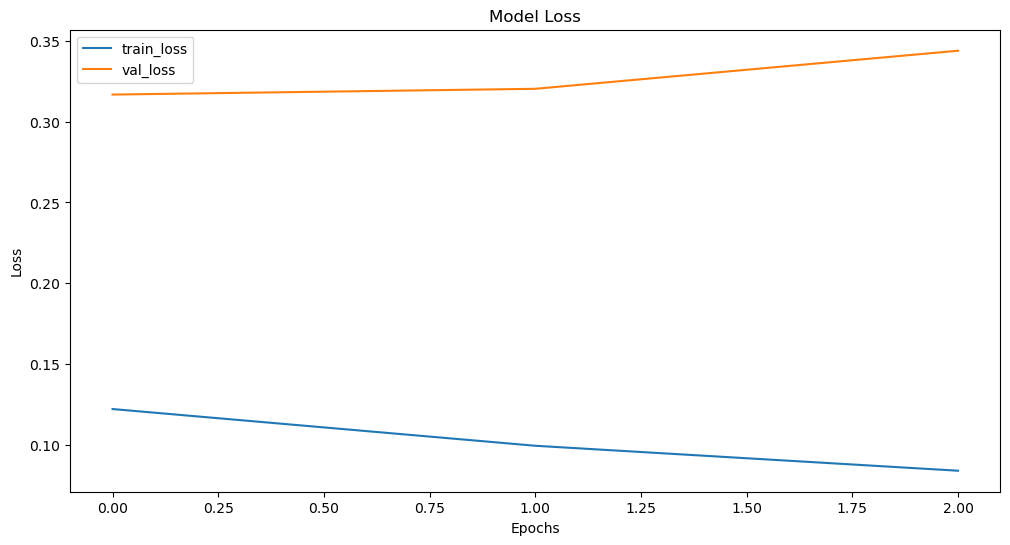

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [57]:
y_pred_probs = model.predict(X_test_padded)
y_pred = y_pred_probs.argmax(axis=1)

329/329 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step


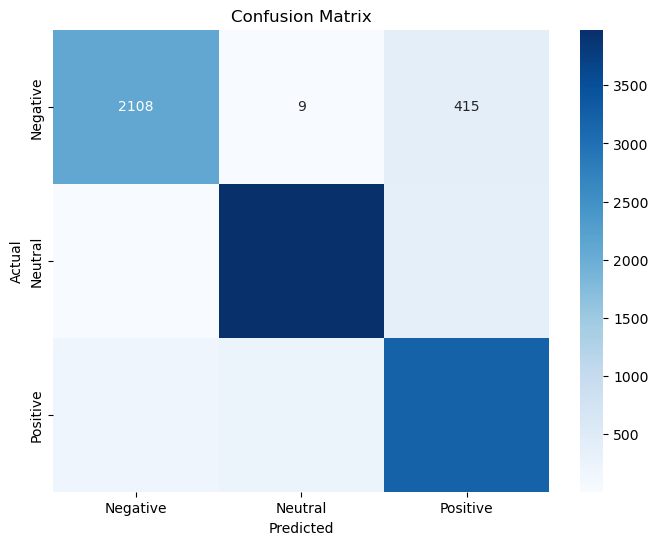

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.83      0.87      2532
     Neutral       0.94      0.91      0.93      4365
    Positive       0.80      0.89      0.84      3624

    accuracy                           0.88     10521
   macro avg       0.89      0.88      0.88     10521
weighted avg       0.89      0.88      0.89     10521



In [60]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_probs[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score((y_test == i).astype(int), y_pred_probs[:, i])

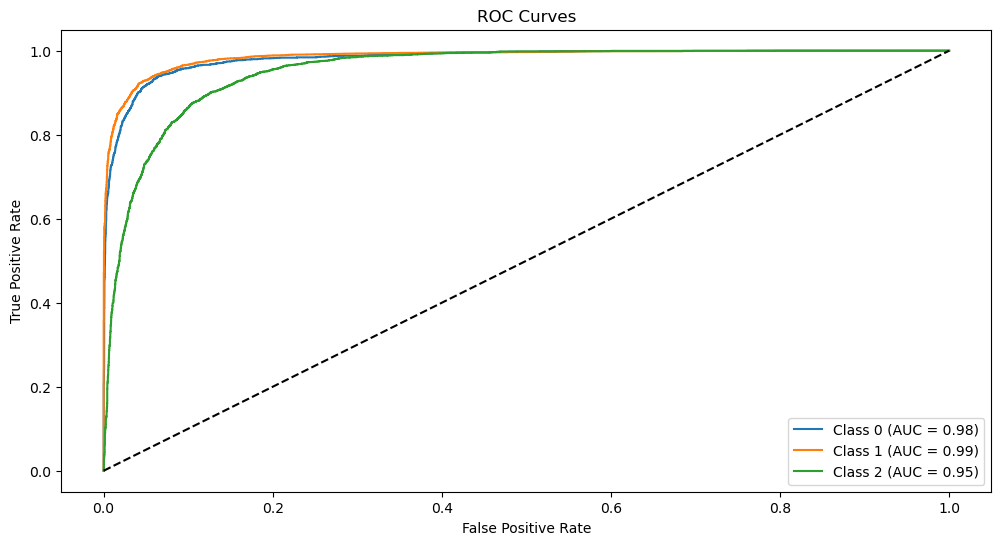

In [61]:
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()